In [1]:
import seaborn as sns
import wandb
import pandas as pd
import matplotlib.pyplot as plt


---
## Init wandb

In [2]:
api = wandb.Api()

In [3]:
entity, project= "ece517", "acrobot"
runs = api.runs(f'{entity}/{project}')

In [4]:
summary_list, config_list, name_list = [], [], []
run_data_df_list = []

for run in runs:
    group = run.group
    summary_list.append(run.summary._json_dict)

    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})
    run_data_df = run.history()
    run_data_df['group'] = group
    for k,v in config_list[-1].items():
        if type(v) != dict:
            run_data_df[k] = v
    run_data_df_list.append(run_data_df)

    name_list.append(run.name)


In [5]:
runs_df = pd.concat(run_data_df_list)
runs_df = runs_df.replace({
    'group': {
        'ppo_ex': 'PPO',
        'ppo_1': 'PPO-Shared',
        'ppo_2': 'PPO-Transformer'

    }
})
runs_df['model'] = runs_df['group']
runs_df = runs_df.drop(columns=['group'])

In [6]:
runs_df

,trainer/global_step,avg_ep_len,avg_reward,_step,loss_actor,_runtime,loss_critic,epoch,avg_ep_reward,_timestamp,...,gamma,lr_actor,lr_critic,batch_size,clip_ratio,hidden_size,nb_optim_iters,max_episode_len,steps_per_epoch,model
0,1,250.000000,-0.500000,0,0.000017,8.015495,6854.092145,0,-250.000000,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
1,3,500.000000,-1.000000,1,-0.000458,12.050505,6785.880432,1,-500.000000,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
2,5,500.000000,-1.000000,2,-0.000666,16.019755,6696.552068,2,-500.000000,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
3,7,500.000000,-1.000000,3,-0.000767,20.157108,6554.093709,3,-500.000000,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
4,9,500.000000,-1.000000,4,0.000064,24.383168,6405.917290,4,-500.000000,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,291,105.263168,-0.990723,145,-0.000037,482.619852,514.350882,145,-104.263168,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
146,293,105.105270,-0.990723,146,-0.000086,486.410326,417.254480,146,-104.105270,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
147,295,102.490784,-0.990479,147,0.000006,490.193985,438.676934,147,-101.490784,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
148,297,103.885513,-0.990479,148,-0.000064,494.011953,410.955234,148,-102.885513,1.670867e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO


---
# Plots

In [7]:
def plot_data(var, title=None, y_log_scale=False):
    sns.set_theme(style="whitegrid")
    # sns.color_palette("nipy_spectral_r")
    #'seismic_r'
    sns.set_context("paper")
    plot = sns.lineplot(x="epoch", y=var,
                        hue="model",
                        data=runs_df, palette='Set1')
    if title is not None:
        plot.set(title=title)
    if y_log_scale:
        plot.set_yscale("log")
    plt.tight_layout()
    plt.savefig(f'{project}-{var}.png')

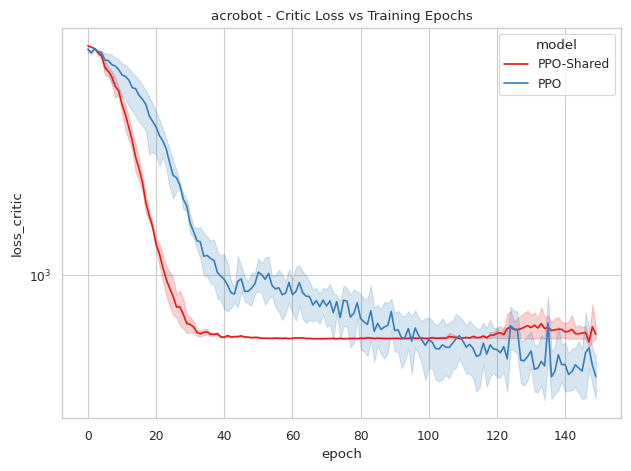

In [8]:
plot_data('loss_critic', title=f"{project} - Critic Loss vs Training Epochs", y_log_scale=True)


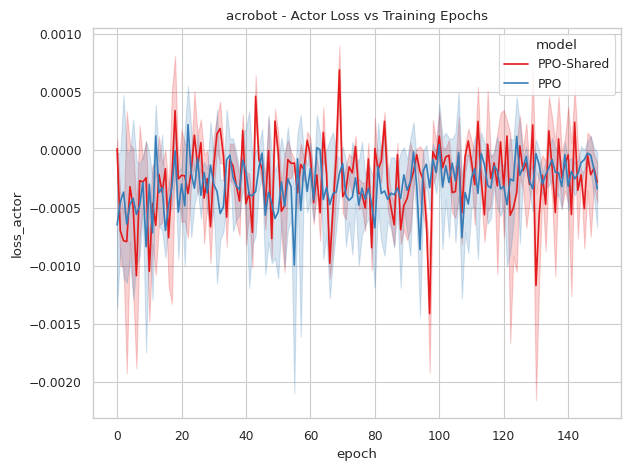

In [9]:
plot_data('loss_actor', title=f"{project} - Actor Loss vs Training Epochs")


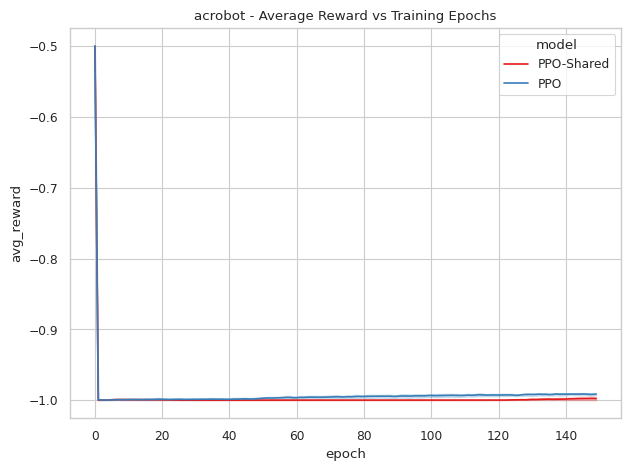

In [10]:
plot_data('avg_reward', title=f"{project} - Average Reward vs Training Epochs")


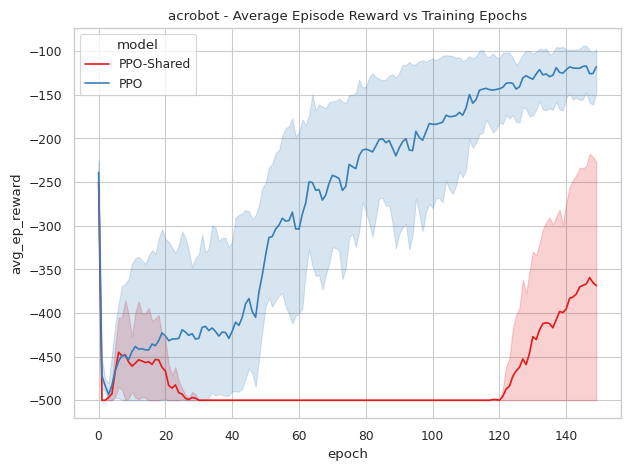

In [11]:
plot_data('avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs")


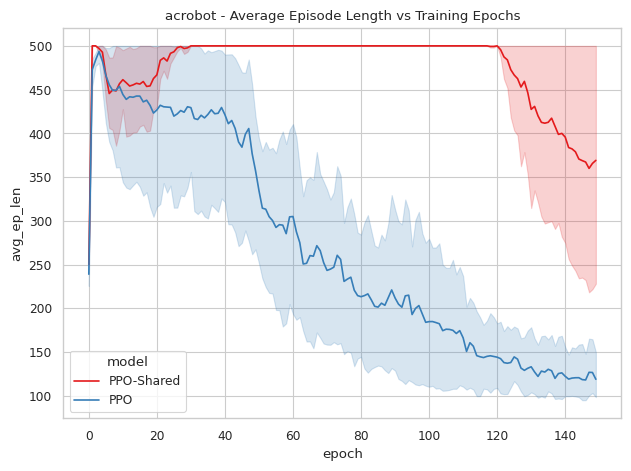

In [12]:
plot_data('avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs")
